In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

news_data = pd.read_csv('./OnlineNewsPopularity.csv')
news_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
news_data.shape

(39644, 61)

In [3]:
print("\nFirst artcile in database")
print(news_data.iloc[0,:])


First artcile in database
url                              http://mashable.com/2013/01/07/amazon-instant-...
 timedelta                                                                     731
 n_tokens_title                                                                 12
 n_tokens_content                                                              219
 n_unique_tokens                                                          0.663594
                                                       ...                        
 title_subjectivity                                                            0.5
 title_sentiment_polarity                                                  -0.1875
 abs_title_subjectivity                                                          0
 abs_title_sentiment_polarity                                               0.1875
 shares                                                                        593
Name: 0, Length: 61, dtype: object


Text(0, 0.5, 'shares')

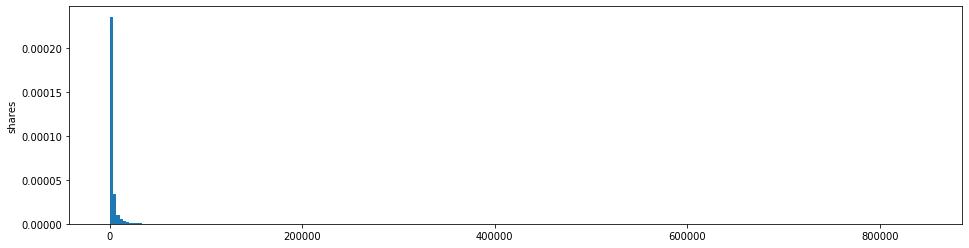

In [4]:
#Wartości odstające - Wykres

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16.0
fig_size[1] = 4.0

x = news_data[' shares']
plt.hist(x, density=True, bins=250)
plt.ylabel('shares')

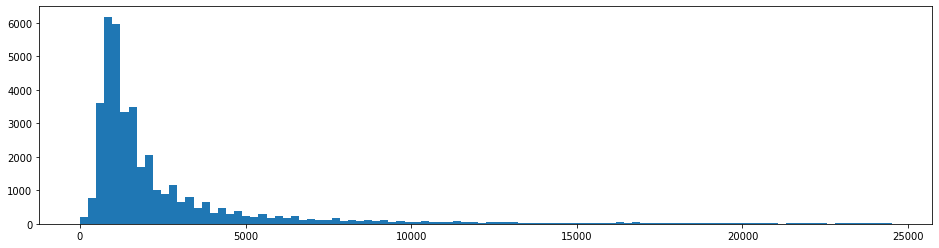

(39053, 1)

In [5]:
#Usuwanie wartości odstających

def reject_outliers(shares):
    u = np.median(news_data[' shares'])
    s = np.std(news_data[' shares'])
    filtered= [e for e in (news_data[' shares']) if (u - 2 * s < e < u + 2 * s)]
    return filtered

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0

filtered = reject_outliers('shares')
plt.hist(filtered, 100)
fig_size[0]=16.0
fig_size[1]=8.0
plt.show()

news_data_shares = pd.DataFrame(filtered)
news_data_shares.shape

#Oryginalna liczba wierszy to 39644. Dzięki użyciu powyższej funkcji usunęliśmy 591 wartości odstających w podanym datasecie

In [6]:
#Tworzenie nowych danych bez wartości odstających.
#Definiujemy wartość odstającą jako wartość atrybutu „shares”, która jest poza dwoma standardowymi odchyleniami
#(= 3395 + (2 x 11627) = 26649)
fixedData = news_data[news_data[' shares']<26647]

In [7]:
#USTALENIE DANYCH WEJŚCIOWYCH I TARGETU
data = fixedData.iloc[1:,2:-1]
target = fixedData.iloc[1:,-1]
data.head()


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286


In [8]:
# STANDARYZACJA DANYCH
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[3.33333333e-01, 3.00920463e-02, 8.62686278e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 2.48996932e-02, 8.20441556e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 6.26622610e-02, 7.18670296e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.80952381e-01, 5.21595468e-02, 7.36597916e-04, ...,
        5.68181818e-01, 9.09090909e-02, 1.36363636e-01],
       [1.90476190e-01, 8.04814727e-02, 7.69605268e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [3.80952381e-01, 1.85272599e-02, 1.00140763e-03, ...,
        6.25000000e-01, 3.33333333e-01, 2.50000000e-01]])

In [9]:
#------------------------------------------------------------------------------------
# Regresja liniowa z usuniętymi wartościami odstającymi z zastosowaniem SVD redukcji wymiarowości
from sklearn.decomposition import PCA

pca = PCA(n_components=40) #Metoda PCA
pca_data = pca.fit(data).transform(data)
pca_data

array([[-2.70094081e-01,  5.01763511e-02,  1.25571265e+00, ...,
         2.43600217e-02, -1.02652170e-02, -6.59852599e-04],
       [-3.43564821e-01,  3.59062421e-01,  7.73363301e-01, ...,
         1.40905887e-02, -3.66278382e-02, -6.55350119e-02],
       [ 4.18502687e-02, -3.73549896e-01, -2.23127602e-01, ...,
        -2.54338673e-02,  5.41945242e-04, -5.60512983e-03],
       ...,
       [-2.39187021e-01, -3.39720530e-01, -1.63448832e-01, ...,
         3.57177383e-03, -5.72795139e-03,  3.06800783e-02],
       [ 1.28288484e+00,  7.63523484e-02,  1.61147576e-01, ...,
         1.32208634e-02,  5.19957444e-04, -7.08313188e-03],
       [-4.55926505e-01, -6.88475344e-01, -3.27536339e-01, ...,
        -3.17496875e-02,  3.86182576e-02,  4.93839309e-02]])

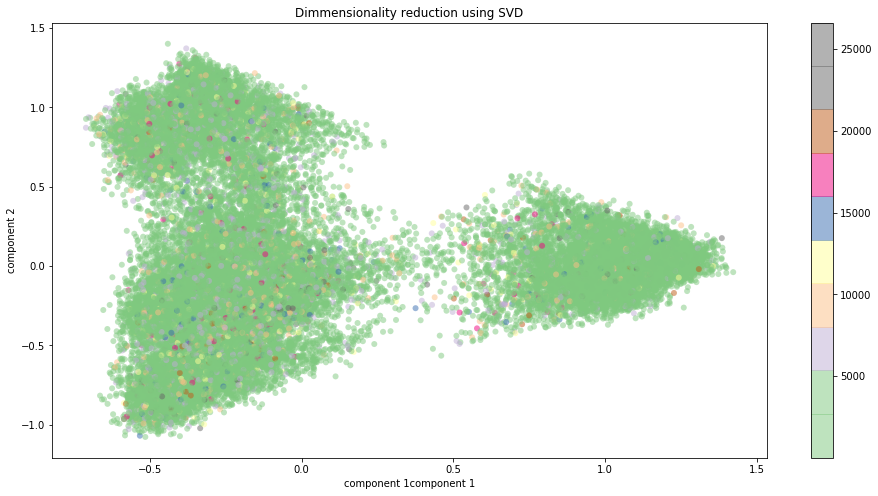

In [10]:
#Wizualizacja na wykresie
plt.scatter(pca_data[:, 0], pca_data[:, 1],
            c=target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1component 1')
plt.ylabel('component 2')
plt.title('Dimmensionality reduction using SVD')
plt.colorbar();

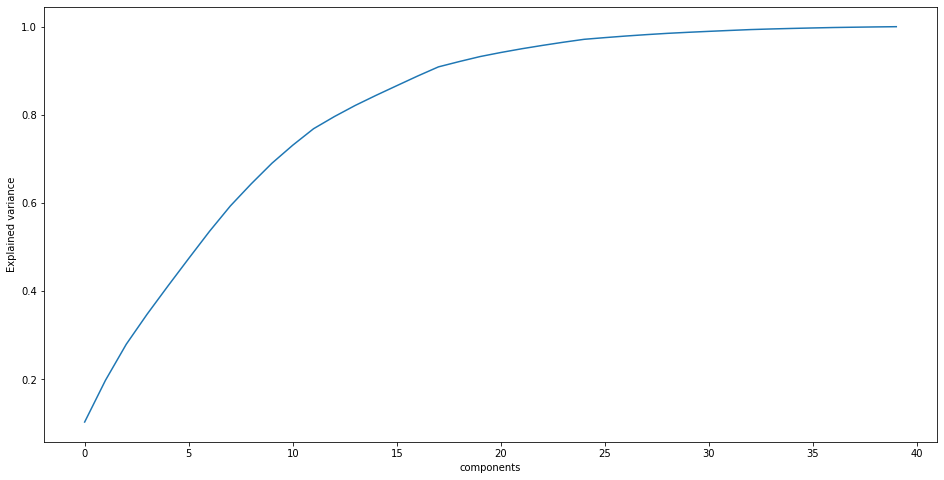

In [11]:
#Explained Variance -> SVD for Online news popularity
pca = PCA().fit(pca_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('Explained variance');

In [12]:
#DZIELENIE DANYCH NA MODELE UCZĄCE I TESTOWE

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(pca_data, target, test_size = 0.10)
print("Training dataset:")
print("data_train:", data_train.shape)
print("target_train:", target_train.shape)
print("\nTesting dataset:")
print("data_test:", data_test.shape)
print("target_test:", target_test.shape)

Training dataset:
data_train: (35216, 40)
target_train: (35216,)

Testing dataset:
data_test: (3913, 40)
target_test: (3913,)


In [13]:
#UCZENIE MODELU
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#PRZEWIDYWANIE
prediction_linear = linear_regression.predict(data_test)

In [15]:
df_someXdata = pd.DataFrame(linear_regression.predict(data_train),list(target_train) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head(10)

,Actual shares,Predicted shares
0,1500,3382.889044
1,1200,1494.683792
2,9500,3466.729629
3,652,2686.763357
4,2300,1353.861762
5,2000,1604.701711
6,1700,3859.551361
7,791,2745.282497
8,1300,2142.061389
9,714,2821.664658


Wykres predykcji


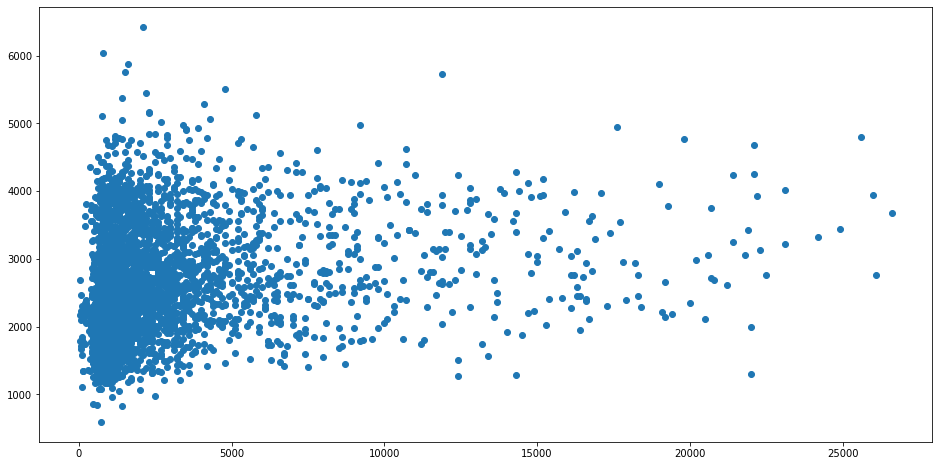

In [16]:
#WYKRES PREDYKCJI
plt.scatter(target_test, prediction_linear)
print("Wykres predykcji")


In [17]:
#Ocena jakości metodą średniego błędu kwadratowego
from sklearn.metrics import mean_squared_error
mse =  mean_squared_error(target_test, prediction_linear)
rmse = np.sqrt(mse)
print("Średni błąd kwadratu wyuczonego modelu: %.2f" %  mse)
print("Pierwiastek średniego błędu kwadratowego: %.2f" %  rmse)

Średni błąd kwadratu wyuczonego modelu: 10407523.61
Pierwiastek średniego błędu kwadratowego: 3226.07


In [18]:
from sklearn.metrics import r2_score #Do usunięcia
print('Variance score: %.2f' % r2_score(target_test, linear_regression.predict(data_test)))

#Wniosek -> Wynik gorszy niż w przypadku czystej regresji
# Najczęściej jest gorszy niż wynik czystej regresji, np 5%-6&

Variance score: 0.05


In [19]:
# Redukcja wymiarowości metodą SVD Truncated
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=40)
svd_data = svd.fit(data).transform(data)
svd_data

array([[ 2.22200275, -0.27792097,  0.07711642, ...,  0.01966763,
        -0.07904075,  0.04767526],
       [ 2.28174142, -0.3415378 ,  0.38033739, ...,  0.00731476,
        -0.12336569,  0.11496566],
       [ 2.16524074,  0.0235443 , -0.34998166, ..., -0.03017328,
        -0.07431731,  0.05844505],
       ...,
       [ 2.30514112, -0.25361135, -0.31618615, ...,  0.00287403,
        -0.01293688, -0.02199114],
       [ 2.4517828 ,  1.28336138,  0.05072502, ...,  0.01286098,
        -0.00618733,  0.01211479],
       [ 2.53575565, -0.46964096, -0.68009413, ..., -0.03018287,
         0.04172715, -0.03941738]])

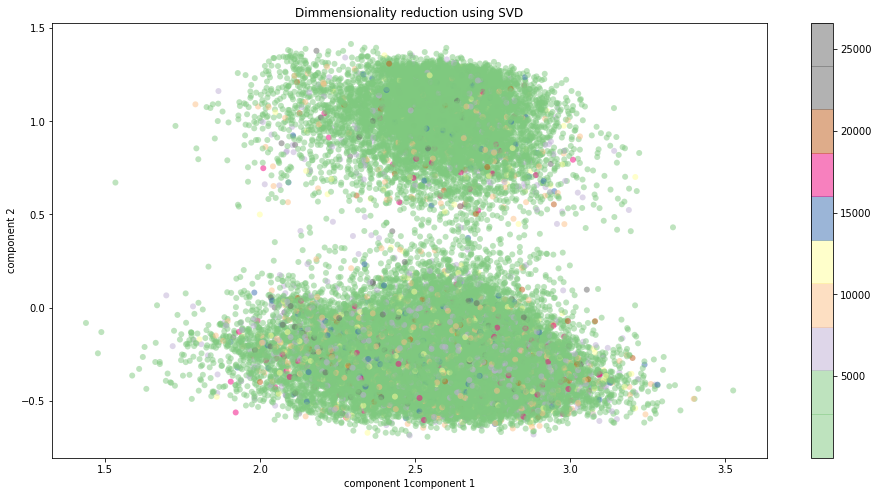

In [20]:
#Wizualizacja na wykresie
plt.scatter(svd_data[:, 0], svd_data[:, 1],
            c=target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1component 1')
plt.ylabel('component 2')
plt.title('Dimmensionality reduction using SVD')
plt.colorbar();

In [21]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(svd_data, target, test_size = 0.10)
print("Training dataset:")
print("data_train:", data_train.shape)
print("target_train:", target_train.shape)
print("\nTesting dataset:")
print("data_test:", data_test.shape)
print("target_test:", target_test.shape)

Training dataset:
data_train: (35216, 40)
target_train: (35216,)

Testing dataset:
data_test: (3913, 40)
target_test: (3913,)


In [22]:
#UCZENIE MODELU
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#PRZEWIDYWANIE
prediction_linear = linear_regression.predict(data_test)

In [24]:
df_someXdata = pd.DataFrame(linear_regression.predict(data_train),list(target_train) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head(10)

,Actual shares,Predicted shares
0,1100,2559.792448
1,4500,3932.275553
2,591,3343.557246
3,4500,4087.303040
4,3600,2971.924847
5,857,2005.465577
6,1500,3069.233777
7,975,2098.588255
8,1500,2443.064094
9,606,1617.271520


Wykres predykcji


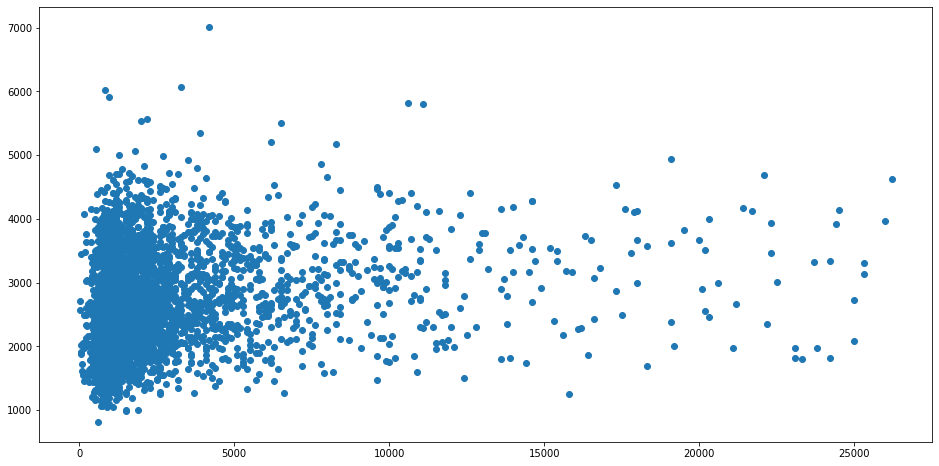

In [25]:
#WYKRES PREDYKCJI
plt.scatter(target_test, prediction_linear)
print("Wykres predykcji")


In [26]:
#Ocena jakości metodą średniego błędu kwadratowego
from sklearn.metrics import mean_squared_error
mse =  mean_squared_error(target_test, prediction_linear)
rmse = np.sqrt(mse)
print("Średni błąd kwadratu wyuczonego modelu: %.2f" %  mse)
print("Pierwiastek średniego błędu kwadratowego: %.2f" %  rmse)

Średni błąd kwadratu wyuczonego modelu: 9787366.55
Pierwiastek średniego błędu kwadratowego: 3128.48


In [27]:
from sklearn.metrics import r2_score #Do usunięcia
print('Variance score: %.2f' % r2_score(target_test, linear_regression.predict(data_test)))

#Wniosek -> Wynik gorszy niż w przypadku czystej regresji
# Najczęściej jest gorszy niż wynik czystej regresji, np 4%-6%

Variance score: 0.06
